In [1]:
#Importando Bibliotecas
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Carregando dados do arquivo .csv
url = 'F:/Pós Graduação/Data Science/bmw.csv'
df = pd.read_csv(url, encoding = 'cp1252', sep = ',')
df.head()


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


# Análise dos dados

In [3]:
df.info() #para obter informações do seu dataframe


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


In [4]:
df.describe() #para ver um descrição mais detalhada 

,year,price,mileage,tax,mpg,engineSize
count,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000
mean,2017.078935,22733.408867,25496.986550,131.702068,56.399035,2.167767
std,2.349038,11415.528189,25143.192559,61.510755,31.336958,0.552054
min,1996.000000,1200.000000,1.000000,0.000000,5.500000,0.000000
25%,2016.000000,14950.000000,5529.000000,135.000000,45.600000,2.000000
50%,2017.000000,20462.000000,18347.000000,145.000000,53.300000,2.000000
75%,2019.000000,27940.000000,38206.000000,145.000000,62.800000,2.000000
max,2020.000000,123456.000000,214000.000000,580.000000,470.800000,6.600000


In [5]:
df.shape

(10781, 9)

# Limpeza de dados

In [6]:
#Exibição de registros duplicados

duplicated = df[df.duplicated(keep='first')]
print(duplicated)

          model  year  price transmission  mileage fuelType  tax    mpg  \
174          X4  2019  33998    Semi-Auto     7272   Diesel  150   42.8   
393          X1  2018  16995    Semi-Auto    17276   Petrol  150   46.3   
709    2 Series  2014  11999       Manual    31289   Diesel   30   62.8   
957    1 Series  2019  21898       Manual     4100   Petrol  150   41.5   
1173   1 Series  2017  20995    Semi-Auto    31544   Petrol  145   39.8   
...         ...   ...    ...          ...      ...      ...  ...    ...   
7808   5 Series  2019  31550    Automatic     1550   Hybrid  140  156.9   
9096         M4  2020  45488    Automatic       10   Petrol  150   34.0   
9797   4 Series  2019  25449    Automatic     6890   Diesel  145   65.7   
9940         M3  2009  16950       Manual    65000   Petrol  580   21.9   
9943   3 Series  2013  10985    Automatic    70000   Diesel  165   50.4   

      engineSize  
174          2.0  
393          1.5  
709          2.0  
957          1.5  
1173

In [7]:
#Exclusão de registros duplicados
df.drop_duplicates(keep='first', inplace=True) 

In [8]:
#Verificação de registros nulos
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [9]:
#Verificação de registros NAN
df.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

# LGPD
### Para exemplificar o uso da manipulação de dados referentes à LGPD iremos considerar a coluna fuelType como uma informação confidencial

In [10]:
#Importando biblioteca de Hashs
import hashlib

In [28]:
#Hashing fuelType
def fuelTypeHashing(fuelType):
    if fuelType not in key:
        sha3 = hashlib.sha3_512()
        data = salt + fuelType
        sha3.update(data.encode('utf-8'))
        hexdigest = sha3.hexdigest()
        key[fuelType] = hexdigest
        return hexdigest
    else:
        return key[fuelType]
    
salt= 'medium'
key = {}

temp = df

fuelType = temp['fuelType'].map(fuelTypeHashing)

temp['fuelType'] = fuelType

temp.head()


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,df5413cb5bb6be66c6ed80d8fd4a480a0706b1eec80e55...,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,484a600038d2ea59c40421f5712b5dc4702438a4cbbdc5...,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,df5413cb5bb6be66c6ed80d8fd4a480a0706b1eec80e55...,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,df5413cb5bb6be66c6ed80d8fd4a480a0706b1eec80e55...,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,df5413cb5bb6be66c6ed80d8fd4a480a0706b1eec80e55...,160,50.4,3.0


In [29]:
fuelType.head()

0    df5413cb5bb6be66c6ed80d8fd4a480a0706b1eec80e55...
1    484a600038d2ea59c40421f5712b5dc4702438a4cbbdc5...
2    df5413cb5bb6be66c6ed80d8fd4a480a0706b1eec80e55...
3    df5413cb5bb6be66c6ed80d8fd4a480a0706b1eec80e55...
4    df5413cb5bb6be66c6ed80d8fd4a480a0706b1eec80e55...
Name: fuelType, dtype: object

# Visualização e Inteligência de Dados

In [13]:
#Quantidade de registros únicos para cada Coluna
df.nunique()

model             24
year              25
price           3777
transmission       3
mileage         8086
fuelType           5
tax               38
mpg              102
engineSize        17
dtype: int64

In [14]:
#Listagem e quantidades de modelos de carros BMW Presentes no Dataset
df['model'].value_counts()

 3 Series    2434
 1 Series    1962
 2 Series    1188
 5 Series    1051
 4 Series     986
 X1           797
 X3           550
 X5           464
 X2           261
 X4           177
 M4           122
 6 Series     108
 Z4           107
 7 Series     106
 X6           106
 X7            55
 i3            43
 8 Series      39
 M5            29
 M3            26
 M2            21
 i8            17
 M6             8
 Z3             7
Name: model, dtype: int64

In [31]:
#Listagem e quantidades de carros manuais e automáticos
df['transmission'].value_counts()

Semi-Auto    4637
Automatic    3542
Manual       2485
Name: transmission, dtype: int64

In [16]:
#Preço médio de venda
df['price'].mean()

22692.88869092273

In [17]:
#Preço máximo de venda
df['price'].max()

123456

In [18]:
#Preço mínimo de venda
df['price'].min()

1200

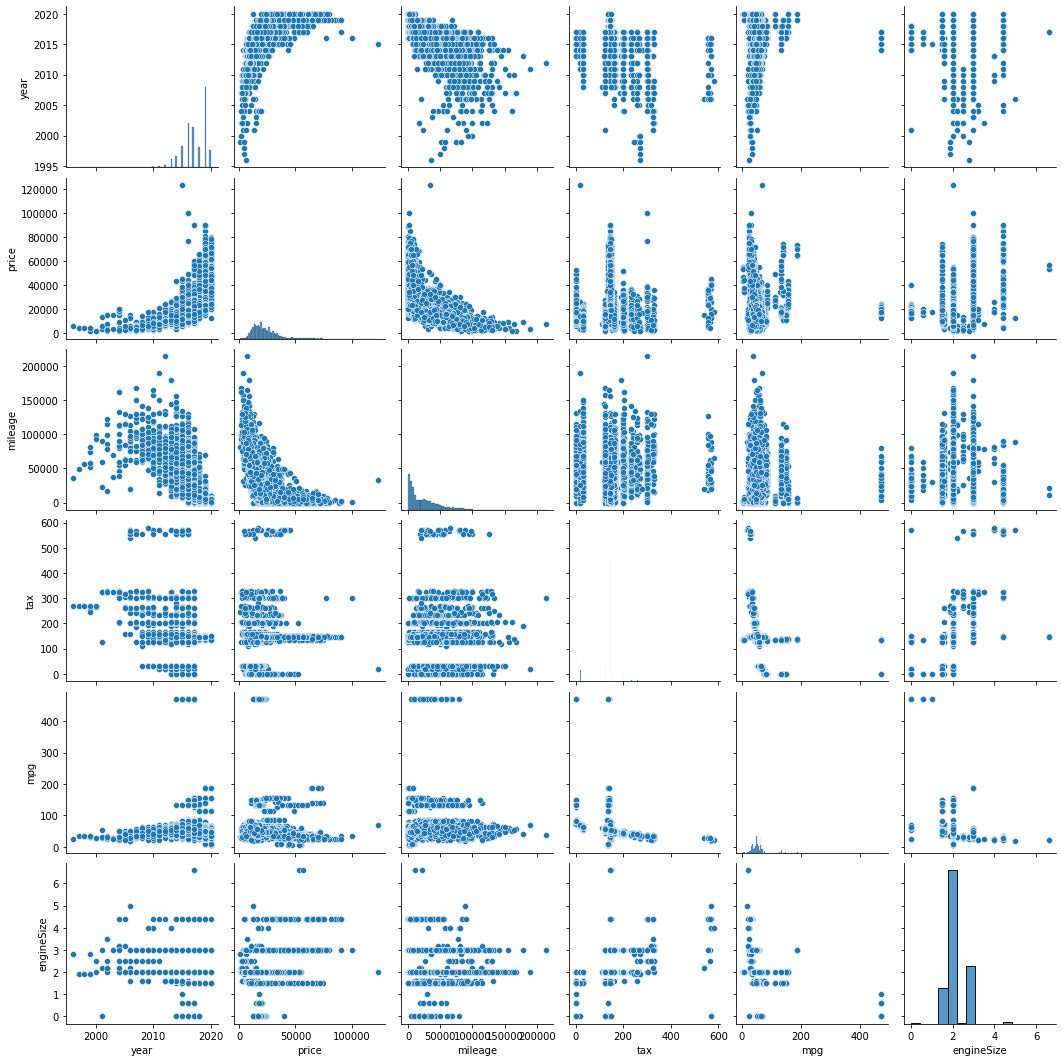

In [19]:
#Gráfico de correlação entre as colunas
sns.pairplot(df)

<AxesSubplot:ylabel='Frequency'>

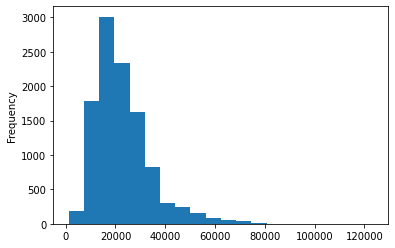

In [20]:
#Histograma de frequência de preços de venda
df['price'].plot(kind='hist', bins=20)

<AxesSubplot:ylabel='Frequency'>

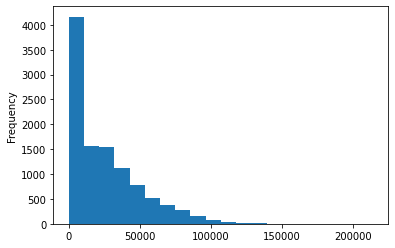

In [21]:
#Histograma de frequência de milhas rodadas
df['mileage'].plot(kind='hist', bins=20)

<AxesSubplot:xlabel='year'>

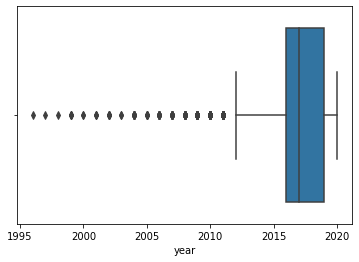

In [22]:
#Boxplot da coluna Ano do veículo
sns.boxplot(x=df['year'])

<AxesSubplot:xlabel='price'>

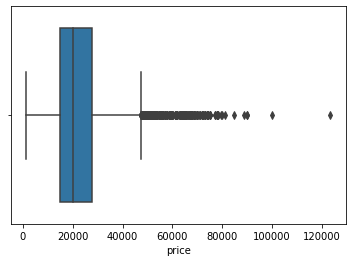

In [23]:
#Boxplot da coluna Preço do veículo
sns.boxplot(x=df['price'])

<AxesSubplot:xlabel='mileage'>

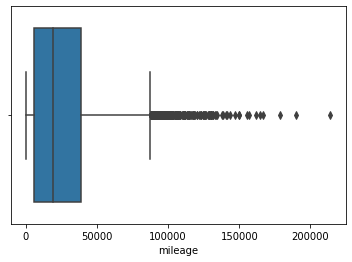

In [24]:
#Boxplot da coluna de milhas rodadas
sns.boxplot(x=df['mileage'])

<AxesSubplot:xlabel='tax'>

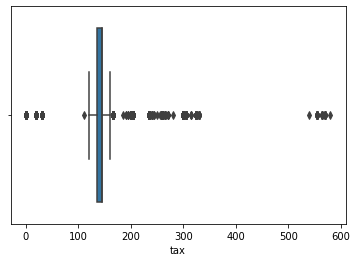

In [25]:
#Boxplot da coluna do imposto de rodagem
sns.boxplot(x=df['tax'])

<AxesSubplot:xlabel='year', ylabel='price'>

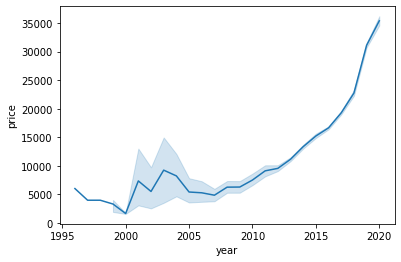

In [26]:
#Gráfico de linha apresentando a relação entre preço e ano do veículo
sns.lineplot(data=df, x="year", y="price")

<AxesSubplot:xlabel='year', ylabel='mileage'>

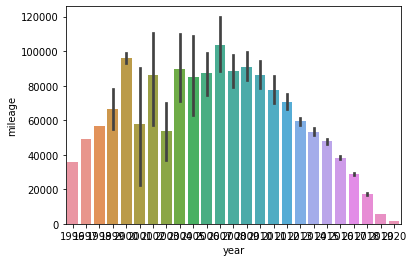

In [27]:
#Gráfico de barras apresentando a relação entre milhas rodadas e ano do veículo
sns.barplot(data=df, x="year", y="mileage")
